# 정규화 선형 회귀 

정규화(regularized) 선형 회귀 방법은 선형 회귀 계수(weight)에 대한 제약 조건을 추가함으로써 계수의 분산을 감소시키는 방법이다. Regularized Method, Penalized Method, Contrained Least Squares 이라고도 불리운다.

일반적으로 세가지 정규화 선형 회귀 모형이 사용된다.

* Ridge 회귀 모형 
* LASSO 회귀 모형 
* Elastic Net 회귀 모형

## Ridge 회귀 모형

Ridge 회귀 모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum w_i^2
\end{eqnarray}
$$

$\lambda$는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다. $\lambda$가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다. $\lambda$가 작아지면 정규화 정도가 작아지며 $\lambda$ 가 0이 되면 일반적인 선형 회귀 모형이 된다.

## LASSO 회귀 모형

LASSO(Least Absolute Shrinkage and Selection Operator) 회귀 모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda \sum | w_i |
\end{eqnarray}
$$

## Elastic Net 회귀 모형

Elastic Net 회귀 모형은 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.


$$
\begin{eqnarray}
\text{cost} 
&=& \sum e_i^2 + \lambda_1 \sum | w_i | + \lambda_2 \sum w_i^2
\end{eqnarray}
$$

$\lambda_1$, $\lambda_2$ 두 개의 하이퍼 모수를 가진다.

## statsmodels의 정규화 회귀 모형

statsmodels 패키지는 OLS 선형 회귀 모형 클래스의 `fit_regularized` 메서드를 사용하여 Elastic Net 모형 계수를 구할 수 있다.

* http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

하이퍼 모수는 다음과 같이 모수 $\text{alpha} $ 와 $\text{L1_wt}$ 로  정의된다.

$$
0.5 \times \text{RSS}/N + \text{alpha} \times \big( 0.5 \times (1-\text{L1_wt})\sum w_i^2 + \text{L1_wt} \sum |w_i| \big)
$$

In [25]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5)", data=df)
result1 = model.fit()
result1.params

Intercept     1.126872
x            -2.178934
I(x ** 2)     0.831280
I(x ** 3)   -26.179823
I(x ** 4)    48.667360
I(x ** 5)   -22.317003
dtype: float64

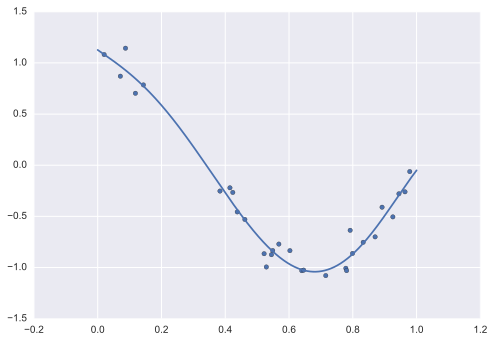

In [41]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()
    
plot_statsmodels(result1)    

Intercept    0.735825
x           -2.297745
I(x ** 2)   -0.869221
I(x ** 3)    0.240199
I(x ** 4)    0.860333
I(x ** 5)    1.148527
dtype: float64


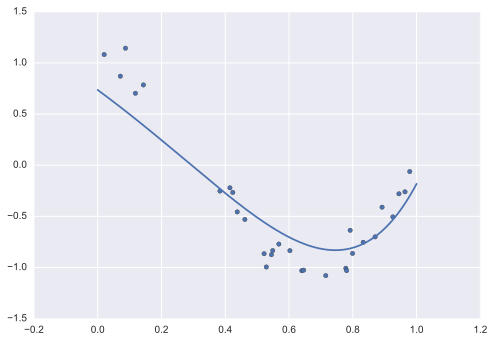

In [51]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2) 

Intercept    0.791332
x           -2.803618
I(x ** 2)    0.000000
I(x ** 3)    0.000000
I(x ** 4)    0.642781
I(x ** 5)    1.183472
dtype: float64


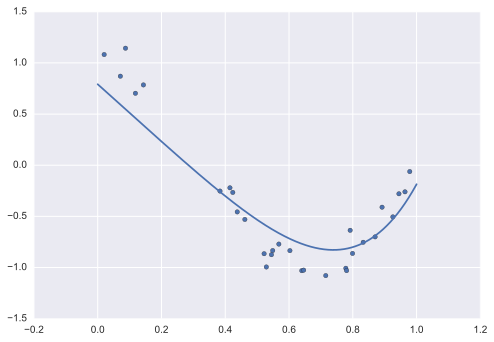

In [52]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result2.params)
plot_statsmodels(result2) 

Intercept    0.913274
x           -3.141250
I(x ** 2)    0.000000
I(x ** 3)    0.000000
I(x ** 4)    0.775632
I(x ** 5)    1.349318
dtype: float64


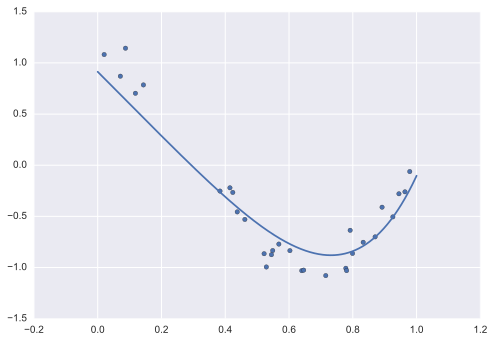

In [53]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result2.params)
plot_statsmodels(result2) 

## Scikit-Learn의 정규화 회귀 모형

Scikit-Learn 패키지에서는 정규화 회귀 모형을 위한 `Ridge`, `Lasso`, `ElasticNet` 이라는 별도의 클래스를 제공한다. 각 모형에 대한 최적화 목적 함수는 다음과 같다.

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

$$
\text{RSS} + \text{alpha} \sum w_i^2
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

$$
0.5 \times \text{RSS}/N + \text{alpha} \sum |w_i|
$$

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

$$
0.5 \times \text{RSS}/N + 0.5 \times \text{alpha} \times \big(0.5 \times  (1-\text{l1_ratio})\sum w_i^2 + \text{l1_ratio} \sum |w_i| \big)
$$


In [83]:
def plot_sklearn(model):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(3)

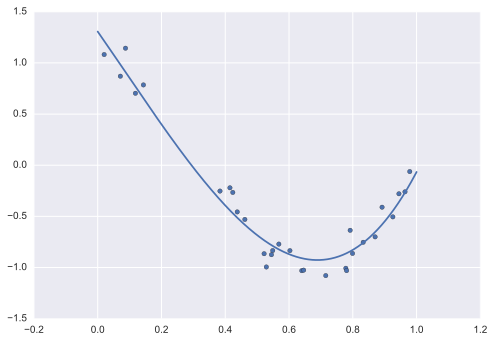

In [89]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X[:, np.newaxis], y)
plot_sklearn(model)

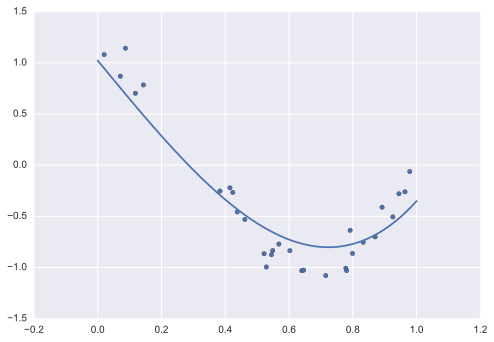

In [90]:
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X[:, np.newaxis], y)
plot_sklearn(model)

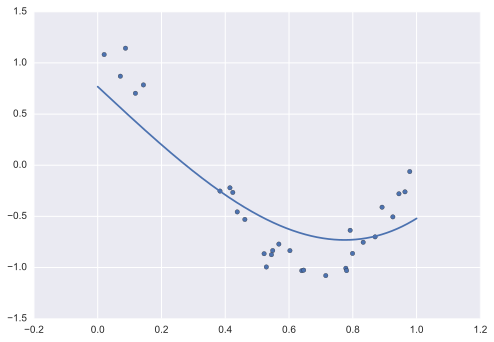

In [92]:
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X[:, np.newaxis], y)
plot_sklearn(model)

## 정규화 모형의 장점

정규화 모형은 오차-분산 트레이드오프(bias-variance trade-off) 원리에 따라 분산을 감소시키는 효과를 가진다.

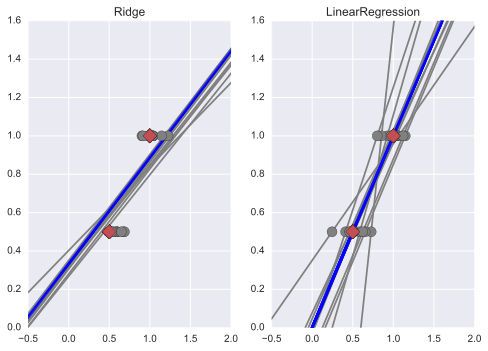

In [95]:
X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[-1, 3].T
np.random.seed(0)

models = {"LinearRegression": LinearRegression(), 
          "Ridge": Ridge(alpha=0.1)}

for i, (name, model) in enumerate(models.iteritems()):
    ax = plt.subplot(1, 2, i+1)
    for _ in range(10):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        model.fit(this_X, y_train)
        ax.plot(X_test, model.predict(X_test), color='.5')
        ax.scatter(this_X, y_train, s=100, c='.5', marker='o', zorder=10)
        model.fit(X_train, y_train)
        ax.plot(X_test, model.predict(X_test), linewidth=3, color='blue', alpha=0.5)
        ax.scatter(X_train, y_train, s=100, c='r', marker='D', zorder=10)
        plt.title(name)
        ax.set_xlim(-0.5, 2)
        ax.set_ylim(0, 1.6)

## Ridge 모형과 Lasso 모형의 차이

Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.

<img src="https://datascienceschool.net/upfiles/10a19727037b4898984a4330c1285486.png">

In [96]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [111]:
ridge0 = Ridge(alpha=0).fit(X, y)
p0 = pd.Series(np.hstack([ridge0.intercept_, ridge0.coef_]))
ridge1 = Ridge(alpha=1).fit(X, y)
p1 = pd.Series(np.hstack([ridge1.intercept_, ridge1.coef_]))
ridge2 = Ridge(alpha=2).fit(X, y)
p2 = pd.Series(np.hstack([ridge2.intercept_, ridge2.coef_]))
pd.DataFrame([p0, p1, p2]).T

,0,1,2
0,152.133484,152.133484,152.133484
1,-10.012198,29.465746,33.684368
2,-239.819089,-83.154885,-41.040187
3,519.839787,306.351627,223.029964
4,324.390428,201.629434,152.203371
5,-792.184162,5.909369,20.941211
6,476.745838,-29.515927,-2.749722
7,101.044570,-152.040465,-121.063689
8,177.064176,117.311715,103.717329
9,751.279321,262.944995,195.099906


In [102]:
lasso0 = Lasso(alpha=0.0001).fit(X, y)
p0 = pd.Series(np.hstack([lasso0.intercept_, lasso0.coef_]))
lasso1 = Lasso(alpha=0.1).fit(X, y)
p1 = pd.Series(np.hstack([lasso1.intercept_, lasso1.coef_]))
lasso2 = Lasso(alpha=10).fit(X, y)
p2 = pd.Series(np.hstack([lasso2.intercept_, lasso2.coef_]))
pd.DataFrame([p0, p1, p2]).T

,0,1,2
0,152.133484,152.133484,152.133484
1,-9.910816,-0.000000,0.000000
2,-239.727144,-155.362882,0.000000
3,519.881966,517.182017,0.000000
4,324.294322,275.082351,0.000000
5,-784.988701,-52.540269,0.000000
6,471.210031,-0.000000,0.000000
7,97.612539,-210.159753,-0.000000
8,175.802361,0.000000,0.000000
9,748.684614,483.914409,0.000000


## path 메서드

`Lasso` 와 `ElasticNet`  클래스는 하이퍼 모수 `alpha` 값의 변화에 따른 계수의 변화를 자동으로 계산하는 `path` 메서드를 제공한다.
`lasso_path()`, `enet_path()` 명령어도 `path` 메서드와 동일한 기능을 수행한다.

In [145]:
lasso = Lasso()
alphas, coefs, _ = lasso.path(X, y, alphas=np.logspace(-6, 1, 8))
df = pd.DataFrame(coefs, columns=alphas)
df

,10.0,1.0,0.1,0.01,0.001,0.0001,1e-05,1e-06
0,0.0,0.359018,10.286331,33.147694,8.705495,-5.452332,-9.080737,-9.902637
1,0.0,0.000000,0.285976,-35.245064,-178.075235,-230.060677,-238.307326,-239.649466
2,0.0,3.259767,37.464643,211.024640,450.882945,517.356795,520.767952,519.973879
3,0.0,2.204356,27.544898,144.560242,281.073242,317.436537,323.234112,324.258708
4,0.0,0.528646,11.108848,21.931303,-44.061899,-240.402810,-635.231952,-772.936350
5,0.0,0.250935,8.355882,0.000000,-77.939017,40.281395,352.230141,461.473758
6,-0.0,-1.861363,-24.120806,-115.619846,-188.950843,-136.775239,31.891364,92.542411
7,0.0,2.114454,25.505488,100.658528,119.797535,117.921788,158.412929,174.749027
8,0.0,3.105841,35.465757,185.326164,393.706827,533.930194,691.527537,743.979234
9,0.0,1.769851,22.894981,96.257133,98.943979,73.934816,68.648179,67.740903


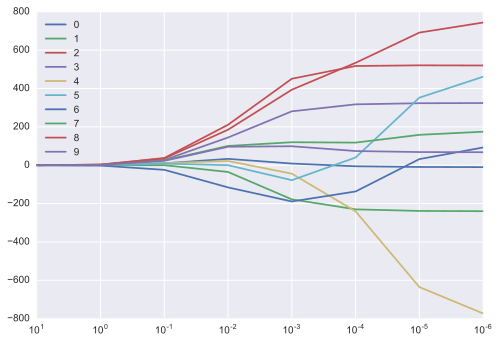

In [146]:
df.T.plot(logx=True)
plt.show()